<a href="https://colab.research.google.com/github/Adisriman/AlexandriaRepo/blob/master/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 
from google.colab import files
uploaded=files.upload()
%matplotlib inline


Saving K_means.csv to K_means.csv


In [2]:
df=pd.read_csv("K_means.csv")
df.head()

,Name,Age,Income
0,Sam,27,70000
1,Sunil,29,90000
2,Nimal,29,61000
3,Kamal,28,60000
4,Anil,42,150000


Text(0, 0.5, 'Income')

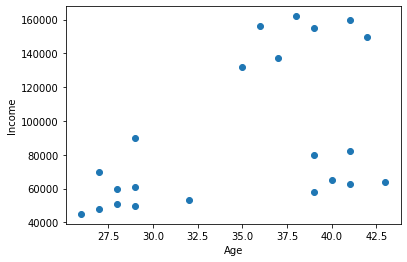

In [4]:
plt.scatter(df.Age,df.Income)
plt.xlabel('Age')
plt.ylabel('Income')

In [5]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(df[['Age','Income']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [6]:
df['cluster']=y_predict
df.head(10)

,Name,Age,Income,cluster
0,Sam,27,70000,2
1,Sunil,29,90000,2
2,Nimal,29,61000,0
3,Kamal,28,60000,0
4,Anil,42,150000,1
5,Ranil,39,155000,1
6,Asoka,41,160000,1
7,Seetha,38,162000,1
8,Suneetha,36,156000,1
9,Sumeda,35,132000,1


In [7]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50285714e+05],
       [3.40000000e+01, 8.05000000e+04]])

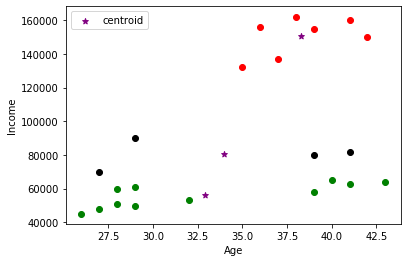

In [10]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1.Income,color='green')
plt.scatter(df2.Age,df2.Income,color='red')
plt.scatter(df3.Age,df3.Income,color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [0]:
#fine tuning the results
scaler=MinMaxScaler()
scaler.fit(df[['Income']])
df['Income']=scaler.transform(df[['Income']])
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

In [17]:
df.head(10)

,Name,Age,Income,cluster
0,Sam,0.058824,0.213675,2
1,Sunil,0.176471,0.384615,2
2,Nimal,0.176471,0.136752,0
3,Kamal,0.117647,0.128205,0
4,Anil,0.941176,0.897436,1
5,Ranil,0.764706,0.940171,1
6,Asoka,0.882353,0.982906,1
7,Seetha,0.705882,1.000000,1
8,Suneetha,0.588235,0.948718,1
9,Sumeda,0.529412,0.743590,1


Text(0, 0.5, 'Income')

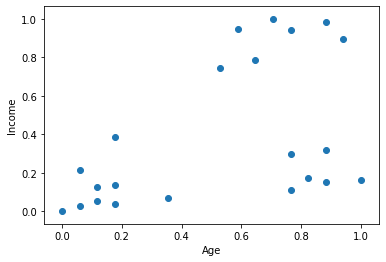

In [20]:
plt.scatter(df.Age,df.Income)
plt.xlabel('Age')
plt.ylabel('Income')

In [21]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(df[['Age','Income']])
y_predict

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [22]:
df['cluster']=y_predict
df.head(10)

,Name,Age,Income,cluster
0,Sam,0.058824,0.213675,2
1,Sunil,0.176471,0.384615,2
2,Nimal,0.176471,0.136752,2
3,Kamal,0.117647,0.128205,2
4,Anil,0.941176,0.897436,1
5,Ranil,0.764706,0.940171,1
6,Asoka,0.882353,0.982906,1
7,Seetha,0.705882,1.000000,1
8,Suneetha,0.588235,0.948718,1
9,Sumeda,0.529412,0.743590,1


In [23]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8998779 ],
       [0.1372549 , 0.11633428]])

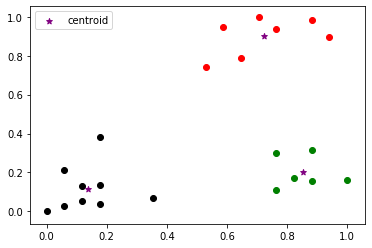

In [24]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1.Income,color='green')
plt.scatter(df2.Age,df2.Income,color='red')
plt.scatter(df3.Age,df3.Income,color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [0]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['Age','Income']])
  sse.append(km.inertia_)

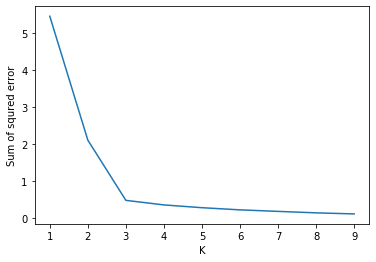

In [26]:
plt.xlabel('K')
plt.ylabel('Sum of squred error') # 3 clusters sre suitable for this (Singular value decomposition) do not use too many clusters
plt.plot(k_rng,sse)